# Q2


In [2]:
from nltk.tokenize import word_tokenize
from collections import Counter
from time import time
import os
import re
import string
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
 
##############train########################

train_txt = '/train_hw2.txt'
cwd = os.getcwd()  # Get the current working directory (cwd)
f = open(cwd + train_txt) #open the file
x_corpusOfTrain=[]
y_corpusOfTrain=[]
index=0

data = f.readlines()
for line in data:
    s_line = line.split('\t')
    y_corpusOfTrain.append(s_line[0])
    x_corpusOfTrain.append(s_line[1])


#2 methods to feature extraction to train:

#first method- tfidf:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,stop_words='english')
x_train_1Tfidf=vectorizer.fit_transform(x_corpusOfTrain)
# print('TF-IDF:',vectorizer.fit_transform(corpusOfTrain).toarray())

#second method-Bag of words:
vectorizer2 = CountVectorizer()
x_train_2BagOfWords=vectorizer2.fit_transform(x_corpusOfTrain)
# print('Bag of Words:',vectorizer2.fit_transform(corpusOfTrain).toarray())

##############test########################

cwd = os.getcwd()  # Get the current working directory (cwd)
test_txt = '/test_hw2.txt'
f = open(cwd + test_txt) #open the file
x_corpusOfTest=[]
y_corpusOfTest=[]

index=0

data = f.readlines()
for line in data:
    s_line = line.split('\t')
    y_corpusOfTest.append(s_line[0])
    x_corpusOfTest.append(s_line[1])

#2 methods to feature extraction to train:

#first method- tfidf:
x_test_1Tfidf=vectorizer.transform(x_corpusOfTest)

#second method-Bag of words:
x_test_2BagOfWords=vectorizer2.transform(x_corpusOfTest)


#3 machine learning models for the first method- tfidf:


# Benchmark tfidf classifiers
print('###########TFIDF###########')
def benchmark1(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(x_train_1Tfidf, y_corpusOfTrain)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(x_test_1Tfidf)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_corpusOfTest, pred)
    print("accuracy:   %0.3f" % score)

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time



results1 = []
for clf, name in (
        (SGDClassifier(),"SVM"),
        (Perceptron(), "Perceptron"),
        (MultinomialNB(),"Naive Bayes")):
    print('=' * 80)
    print(name)
    results1.append(benchmark1(clf))
    

# Benchmark bag_of_words classifiers
print('###########BAG_OF_WORDS###########')
def benchmark2(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(x_train_2BagOfWords, y_corpusOfTrain)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(x_test_2BagOfWords)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_corpusOfTest, pred)
    print("accuracy:   %0.3f" % score)

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time



results2 = []
for clf, name in (
        (SGDClassifier(),"SVM"),
        (Perceptron(), "Perceptron"),
        (MultinomialNB(),"Naive Bayes")):
    print('=' * 80)
    print(name)
    results2.append(benchmark2(clf))



###########TFIDF###########
SVM
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.051s
test time:  0.002s
accuracy:   0.975

Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
train 

###########TFIDF###########


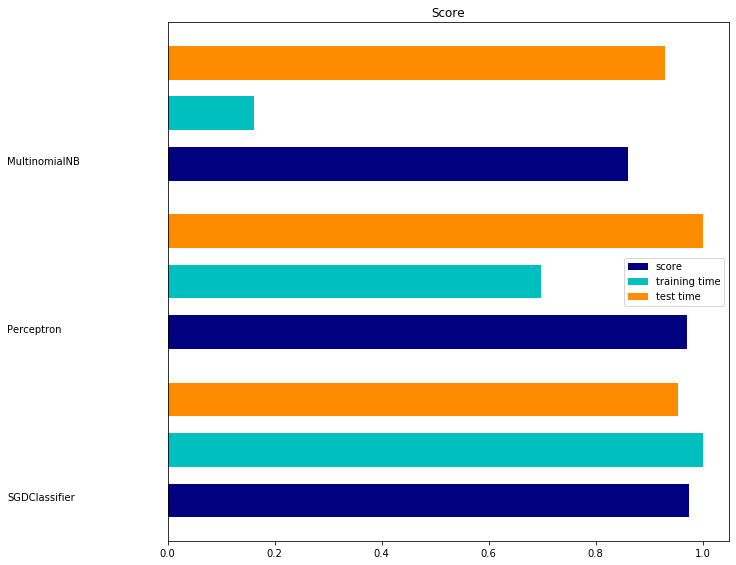

###########BAG_OF_WORDS###########


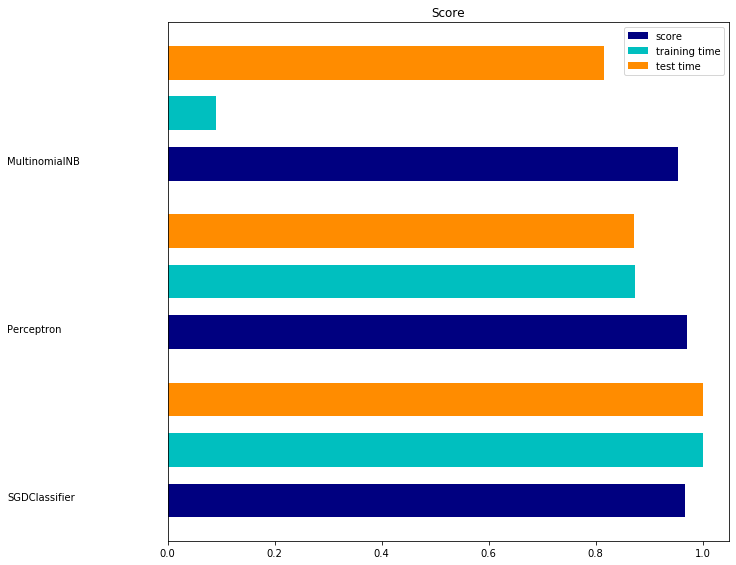

In [13]:
# make some plots
import numpy as np
import matplotlib.pyplot as plt

print('###########TFIDF###########')

indices = np.arange(len(results1))

results1 = [[x[i] for x in results1] for i in range(4)]

clf_names, score, training_time, test_time = results1
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()
   

    # make some plots
import numpy as np
import matplotlib.pyplot as plt

print('###########BAG_OF_WORDS###########')

indices = np.arange(len(results2))

results2 = [[x[i] for x in results2] for i in range(4)]

clf_names, score, training_time, test_time = results2
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()


In [8]:
# Optimization of the NB Classifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


nb_clf = Pipeline([('vect', TfidfVectorizer()),('clf', SGDClassifier())])
parameters =  {'vect__max_df': (0.3,0.5),'clf__alpha': (0.01,1.0)}
gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=1)
gs_clf = gs_clf.fit(x_corpusOfTrain,y_corpusOfTrain)

name = '############TFIDF_SGDClassifier############'
max_score = gs_clf.best_score_
max_params = gs_clf.best_params_

nb_clf = Pipeline([('vect', TfidfVectorizer()),('clf', Perceptron())])
parameters =  {'vect__max_df': (0.3,0.5),'clf__alpha': (0.01,1.0)}
gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=1)
gs_clf = gs_clf.fit(x_corpusOfTrain,y_corpusOfTrain)

if gs_clf.best_score_>max_score :
    name = '############TFIDF_Perceptron############'
    max_score = gs_clf.best_score_
    max_params = gs_clf.best_params_


nb_clf = Pipeline([('vect', TfidfVectorizer()),('clf', MultinomialNB())])
parameters =  {'vect__max_df': (0.3,0.5),'clf__alpha': (0.01,1.0)}
gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=1)
gs_clf = gs_clf.fit(x_corpusOfTrain,y_corpusOfTrain)
if gs_clf.best_score_>max_score :
    name = '############TFIDF_MultinomialNB############'
    max_score = gs_clf.best_score_
    max_params = gs_clf.best_params_

nb_clf = Pipeline([('vect', CountVectorizer()),('clf', SGDClassifier())])
parameters =  {'vect__max_df': (0.3,0.5),'clf__alpha': (0.01,1.0)}
gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=1)
gs_clf = gs_clf.fit(x_corpusOfTrain,y_corpusOfTrain)
if gs_clf.best_score_>max_score :
    name = '############BAG_OF_WORDS_SGDClassifier############'
    max_score = gs_clf.best_score_
    max_params = gs_clf.best_params_

nb_clf = Pipeline([('vect', CountVectorizer()),('clf', Perceptron())])
parameters =  {'vect__max_df': (0.3,0.5),'clf__alpha': (0.01,1.0)}
gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=1)
gs_clf = gs_clf.fit(x_corpusOfTrain,y_corpusOfTrain)
if gs_clf.best_score_>max_score :
    name = '############BAG_OF_WORDS_Perceptron############'
    max_score = gs_clf.best_score_
    max_params = gs_clf.best_params_

nb_clf = Pipeline([('vect', CountVectorizer()),('clf', MultinomialNB())])
parameters =  {'vect__max_df': (0.3,0.5),'clf__alpha': (0.01,1.0)}
gs_clf = GridSearchCV(nb_clf, parameters, n_jobs=1)
gs_clf = gs_clf.fit(x_corpusOfTrain,y_corpusOfTrain)
if gs_clf.best_score_>max_score :
    name = '############BAG_OF_WORDS_MultinomialNB############'
    max_score = gs_clf.best_score_
    max_params = gs_clf.best_params_
# print result
print(name)
print('Best Score:',max_score)
print('Best Params:',max_params)

/Users/avivm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/avivm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/avivm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/avivm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silen

############TFIDF_Perceptron############
Best Score: 0.9608021877848678
Best Params: {'clf__alpha': 0.01, 'vect__max_df': 0.5}
